# File operations

<font face="STCAIYUN" color=#0000FF size=5 >functions summarized: </font>
1. **txt**: open, read, create, write

###  txt: open, read, create , write

In [43]:
import os
import numpy as np

In [44]:
txtfile = '/home/lili/codes/testPython/txt/val.txt'
txtfile_new = os.path.splitext(txtfile)[0] + '_new.txt'

open, read file

In [45]:
with open(txtfile, 'r') as f:
    lines = f.readlines()


create, write file

In [46]:
with open(txtfile_new, 'w') as f:
    for each in lines:
        f.write(each)

### opencv: analyze each line to get the name and box of each image

In [47]:
import os
import numpy as np
import cv2
from pylab import *

In [48]:
txtfile = '/home/lili/codes/testPython/txt/val.txt'
txtfile_new = os.path.splitext(txtfile)[0] + '_new.txt'
#open, read file
with open(txtfile, 'r') as f:
    lines = f.readlines()

get name and box of each line

In [49]:
imgnames = []
boundingboxes = []
minareaboxes = []
for each in lines:
    templist = each.split(' ')
    imgnames.append(templist[0])
    points = np.array([int(x) for x in templist[1:9]])
    points = points.reshape([4, 1, 2])
    tempbox = cv2.boundingRect(points)
    boundingboxes.append(tempbox)
    tempbox = cv2.minAreaRect(points)
    minareaboxes.append(tempbox)   

show images and rectangle

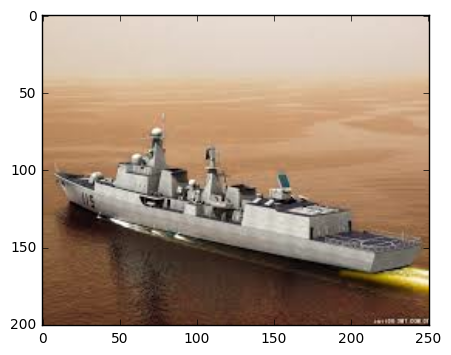

In [56]:
imgdir = '/home/lili/codes/testPython/images/jpg/'
for imgname, bbox, mbox in zip(imgnames, boundingboxes, minareaboxes):
    img = cv2.imread(imgdir + str(imgname))
    imshow(img)
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 1)
    box = cv2.cv.BoxPoints(mbox)
    box = np.int0(box)
    im = cv2.drawContours(img,[box],0,(0,0,255),2)


In [ ]:
import cv2
import numpy as np
%matplotlib inline
img = cv2.imread('../images/jpg/0420001.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
rect = cv2.minAreaRect(cnt)
box = cv2.cv.BoxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(img,[box],0,(0,0,255),2)
imshow(img)

In [ ]:
name=['jack','beginman','sony','pcky']
age=[2001,2003,2005,2000]
for a,n in zip(name,age):
    print a,n